## Notebook 1: Neural Network Transfer Functions and Receptive Fields
<b>Introduction to Soft Computing, Summer 2016 <br>
Wright State University</b>

This notebook provides Python 2 code that implements some very basic neural network concepts.  You can use this notebook both to test your anaconda installation and to experiment with basic neural network implementation concepts.
You are encouraged to run and modify code and variables in the various cells of this notebook to help gain an understanding of basic ideas.

None of the code here is meant to be particularly Pythonic (http://blog.startifact.com/posts/older/what-is-pythonic.html), nor is it intended to particularly efficient.  Rather, the code here is intended to directly map to classroom examples and be easy to understand.  When you become more familiar with the basic neural network ideas, then you can work on translating them into maximally efficient computational forms for your language environment of choice

The Jupyter notebook environment that would have been installed inside Anaconda (and which you are using now), supports the use of "cells" that can contain text content (like in the cell you're now reading) or executable code.  All cells can be executed in order using the [Run All] command in the [Cell] dropdown menu.  Alternatively, one can select and run individual cells with the "run cell select below" button or with other options in the [Cell] dropdown.  Note that any variables and/or function definitions you make in one cell are generally global to all cells.  You will, of course, need to pre-run any cells that produce results upon which your cell of interest is dependent.  For the notebooks in this class, you may want to [Run All] once upon loading so all dependencies are fixed.  You can then edit and rerun individual cells as you experiment with specific features or concepts.

So, first, let's look at some basic package imports that will happen in nearly every notebook in this class:

In [2]:
# Here we set Jupyter behaviors and load needed Python packages.  If you're running from inside
# an Anaconda install, these packages are already downloaded and placed where the Python interpreter
# can find them.  Also, note that other cells depend on these packages being loaded, so this cell 
# MUST be run before you run other cells.  See comments in the introduction.

# This next line instructs Jupyter to create any graphs inside the 
# web browser housing the page.  If you remove or comment out 
# this line, any graphs or plots generated will be opened in 
# a new window.

# I'll repeat this code in other cells so that they can be run independently of one another and each
# treated as stand alone programs. The Python interpreter will not be confused by this, but obviously
# in real code I wouldn't be importing the same things over and over ;)

%matplotlib inline                  
            

import numpy as np                  # This command imports the numpy package.  Numpy provides support
                                    # for scientific computing.  We'll use the linear algebra support 
                                    # a great deal.  We're importing it as "np" so we don't have to 
                                    # type out "numpy" in full when using its features.  Yeah, I'm 
                                    # that lasy.  Also, this is pretty standard practice because 
                                    # everyone is that lazy.
                    
import math as math                 # This command imports the math package.  Herin is support of 
                                    # various math routines we'll need.
    
import matplotlib.pyplot as plt     # This command imports the "matlab like plotting package". We'll 
                                    # use this to make various data plots and graphs to display results.
    

Now let's start looking at how one could implement a simple neuron in python code.  First, let's remind ourselves of what a simple neuron looks like:

![A Simple Neuron.](simple_neuron.png)


The receptive field is the sum of all the input values multiplied by their associated weights:


$$\mathit{\upsilon}\mathrm{{=}}\left({\mathop{\sum}\nolimits_{{i}\mathrm{{=}}{1}}\nolimits^{3}{{w}_{i}{x}_{i}}}\right)\mathrm{{+}}{b}
$$


The receptive field of the neuron would be passed through the neuron's transfer function (sometimes called squashing function) to compute the neuron's output:

$${y}\mathrm{{=}}\mathit{\phi}\left({\mathit{\upsilon}}\right)$$

In lecture and in the book, quite a number of options for transfer functions were discussed.  Here we'll just look at the three we'll most commonly use in this class.  Those are the linear function, the asymmetric sigmoid function, and the symmetric (hyperbolic tangent) transfer function.

<hr>
### Linear Transfer Function
First, let's do some simple code for the linear transfer function:

$$\mathit{\phi}\left({x}\right)\mathrm{{=}}\mathit{\alpha}{x}$$

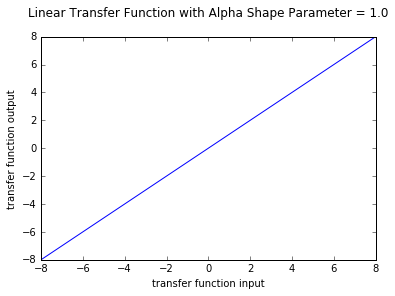

In [3]:
%matplotlib inline                  
            

import numpy as np                  # This command imports the numpy package.  Numpy provides support
                                    # for scientific computing.  We'll use the linear algebra support 
                                    # a great deal.  We're importing it as "np" so we don't have to 
                                    # type out "numpy" in full when using its features.  Yeah, I'm 
                                    # that lasy.  Also, this is pretty standard practice because 
                                    # everyone is that lazy.
                    
import math as math                 # This command imports the math package.  Herin is support of 
                                    # various math routines we'll need.
    
import matplotlib.pyplot as plt     # This command imports the "matlab like plotting package". We'll 
                                    # use this to make various data plots and graphs to display results.

# A python definition of the linear transfer function.  Refer to a Python reference for explainations of Python
# function definition and use

# Function: bp_linear(x, alpha=1)
# Inputs:   [x]      Floating point value that is the functions input
#           [alpha]  Optional floating point value that is the shape parameter (slope) of the line.  Defaults to 1.0
# Output:   returns alpha multiplied by x
# Purpose:  Implements the linear transfer function.  Yeah, it's pretty trivial, but if nothing else it's
#           a simple introduction to Python function use

def bp_linear(x, alpha = 1):
    return alpha * x


# Now lets do a plot to see what it looks like...
# Feel free to change the my_alpha value in the next line 
# experiment with the effects of modifying the shape parameter of this
# transfer function.  

my_alpha = 1.0

# Call to numpy to generate a list of fifty evenly spaced points between -8 and 8.
# These will be used as the x axis points in a plot of the transfer function.

x_points = np.linspace(-8.0, 8.0, num = 50)

# set up the conditions of the plot (title, lables, ranges, etc.)
# you can look up the meaning of these calls in the matplotlib
# documentation

plt.title('Linear Transfer Function with Alpha Shape Parameter = ' + str(my_alpha) + '\n')
plt.xlabel('transfer function input')
plt.ylabel('transfer function output')
plt.axis([-8,8,-8,8])

# Now, let's plot the points.  The first argument to plt.plot is a list of 
# x coordinates at which y values will be plotted.  The second argument is
# Python code to generate the list of corresponding y values by iterating 
# through the x_points, computing the associated y point for each, and 
# assembling them into a list.  I guess this is Pythonic after all, at least
# in this step. 

plt.plot(x_points, [bp_linear(x,alpha = my_alpha) for x in x_points])
plt.show()                                       


<hr>
### Asymmetric Sigmoid Transfer Function

Now, let's do some simple code for the asymmetric sigmoid transfer function:

$$\mathit{\phi}\left({x}\right)\mathrm{{=}}\frac{1}{{1}\mathrm{{+}}{e}^{\mathrm{{-}}\mathit{\alpha}{x}}}$$

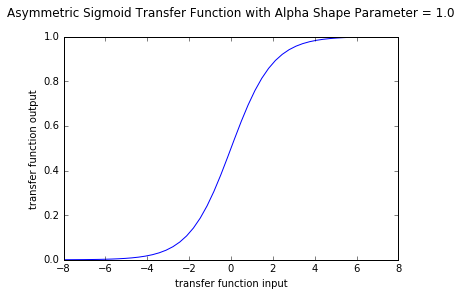

In [4]:
%matplotlib inline                  
            

import numpy as np                  # This command imports the numpy package.  Numpy provides support
                                    # for scientific computing.  We'll use the linear algebra support 
                                    # a great deal.  We're importing it as "np" so we don't have to 
                                    # type out "numpy" in full when using its features.  Yeah, I'm 
                                    # that lasy.  Also, this is pretty standard practice because 
                                    # everyone is that lazy.
                    
import math as math                 # This command imports the math package.  Herin is support of 
                                    # various math routines we'll need.
    
import matplotlib.pyplot as plt     # This command imports the "matlab like plotting package". We'll 
                                    # use this to make various data plots and graphs to display results.

# A Python definition of the asymmetric sigmoid transfer function. Refer to a Python reference for 
# explainations of Python function definition and use

# Function: bp_sigmoid(x, alpha=1)
# Inputs:   [x]      Floating point value that is the functions input
#           [alpha]  Optional floating point value that is the shape parameter (steepness of s-curve) of the 
#                    sigmoid. The larger the value, the more the sigmoid is an approximation of a step
#                    function.
# Output:   The output of the sigmoid function evaluated at [x] with shape parameter [alpha]
# Purpose:  Implements the asymmetric sigmoid function

def bp_sigmoid(x, alpha = 1):
    return 1.0 / (1.0 + math.exp(-alpha * x))

# Now lets do a plot to see what it looks like...
# Feel free to change the my_alpha value in the next line 
# experiment with the effects of modifying the shape parameter of this
# transfer function.  

my_alpha = 1.0

# Call to numpy to generate a list of fifty evenly spaced points between -8 and 8.
# These will be used as the x axis points in a plot of the transfer function.

x_points = np.linspace(-8.0, 8.0, num = 50)

# set up the conditions of the plot (title, lables, ranges, etc.)
# you can look up the meaning of these calls in the matplotlib
# documentationplt.title('Asymmetric Sigmoid Transfer Function with Alpha Shape Parameter\n')

plt.title('Asymmetric Sigmoid Transfer Function with Alpha Shape Parameter = ' + str(my_alpha) + '\n')
plt.xlabel('transfer function input')
plt.ylabel('transfer function output')

# Now, let's plot the points.  The first argument to plt.plot is a list of 
# x coordinates at which y values will be plotted.  The second argument is
# Python code to generate the list of corresponding y values by iterating 
# through the x_points, computing the associated y point for each, and 
# assembling them into a list.  I guess this is Pythonic after all, at least
# in this step. 

plt.plot(x_points, [bp_sigmoid(x,alpha = my_alpha) for x in x_points])
plt.show()                                       



<hr>
### Symmetric Sigmoid Transfer Function

Now, let's do some simple code for the asymmetric sigmoid transfer function:

$$\mathit{\phi}\left({x}\right)\mathrm{{=}}\frac{{1}\mathrm{{-}}{e}^{\mathrm{{-}}{2}\mathit{\alpha}{x}}}{{1}\mathrm{{+}}{e}^{\mathrm{{-}}{2}\mathit{\alpha}{x}}}$$


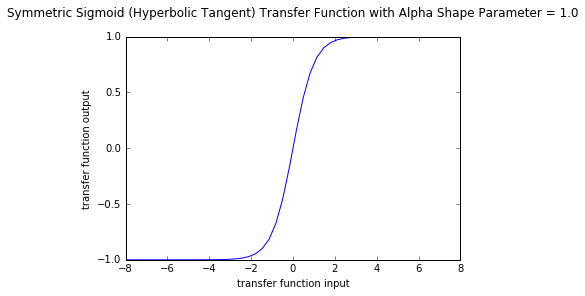

In [5]:
%matplotlib inline                  
            

import numpy as np                  # This command imports the numpy package.  Numpy provides support
                                    # for scientific computing.  We'll use the linear algebra support 
                                    # a great deal.  We're importing it as "np" so we don't have to 
                                    # type out "numpy" in full when using its features.  Yeah, I'm 
                                    # that lasy.  Also, this is pretty standard practice because 
                                    # everyone is that lazy.
                    
import math as math                 # This command imports the math package.  Herin is support of 
                                    # various math routines we'll need.
    
import matplotlib.pyplot as plt     # This command imports the "matlab like plotting package". We'll 
                                    # use this to make various data plots and graphs to display results.
    
# A Python definition of the asymmetric sigmoid transfer function. Refer to a Python reference for 
# explainations of Python function definition and use

# Function: bp_hyperbolic_tan(x, alpha=1)
# Inputs:   [x]      Floating point value that is the functions input
#           [alpha]  Optional floating point value that is the shape parameter (steepness of s-curve) of the 
#                    sigmoid. The larger the value, the more the sigmoid is an approximation of a step
#                    function.
# Output:   The output of the symmetric sigmoid function evaluated at [x] with shape parameter [alpha]
# Purpose:  Implements the symmetric sigmoid function

def bp_hyperbolic_tan(x, alpha = 1):
    return (1.0 - math.exp(-2.0 * alpha * x)) / (1.0 + math.exp(-2.0 * alpha * x))

# Now lets do a plot to see what it looks like...
# Feel free to change the my_alpha value in the next line 
# experiment with the effects of modifying the shape parameter of this
# transfer function.  

my_alpha = 1.0

# Call to numpy to generate a list of fifty evenly spaced points between -8 and 8.
# These will be used as the x axis points in a plot of the transfer function.

x_points = np.linspace(-8.0, 8.0, num = 50)

# set up the conditions of the plot (title, lables, ranges, etc.)
# you can look up the meaning of these calls in the matplotlib
# documentationplt.title('Asymmetric Sigmoid Transfer Function with Alpha Shape Parameter\n')
plt.title('Symmetric Sigmoid (Hyperbolic Tangent) Transfer Function with Alpha Shape Parameter = ' + str(my_alpha) + '\n')
plt.xlabel('transfer function input')
plt.ylabel('transfer function output')


# Now, let's plot the points.  The first argument to plt.plot is a list of 
# x coordinates at which y values will be plotted.  The second argument is
# Python code to generate the list of corresponding y values by iterating 
# through the x_points, computing the associated y point for each, and 
# assembling them into a list.  I guess this is Pythonic after all, at least
# in this step. 
plt.plot(x_points, [bp_hyperbolic_tan(x,alpha = my_alpha) for x in x_points])
plt.show()   


<hr>
### Computing Receptive Fields and Representing Weights

Now, let's return to considering how one might code/represent the process of computing a receptive field.

Let's remind ourselves of the form of a basic neuron and think about ways we could represent it as mathematical and/or programing formalism.

![A Simple Neuron.](simple_neuron.png)

The receptive field is the weighted sum of the inputs plus the bias term, or:

$$\mathit{\upsilon}\mathrm{{=}}\left({\mathop{\sum}\nolimits_{{n}\mathrm{{=}}{1}}\nolimits^{3}{{w}_{n}{x}_{n}}}\right)\mathrm{{+}}{b}
$$


If I were to express the concept in a procedural programming language like C, I might do this:

```c
double x[4] = { 1.0, 1.5, 2.3, 0.3 };     /* Set input vectors. Yes, I know that I'm not "using" 
                                             the zeroth slot and setting it to 1.  We'll come
                                             back to why later */
                                             
double w[4] = { 0.0, 0.25, -0.3, -0.23 }; /* Same thing here, except for weights.  Again, there's
                                             three inputs and three weights but I'm allocating the 
                                             array for FOUR things and apparantly not using it because
                                             I'm indexing the three weights from [1:3].  We'll come 
                                             back to the "why" for this later */
                                             
double bias = 15.0;                        /* set the neuron's bias here */


double receptive_field = 0.0;             /* This is the accumulator into which we'll collect the 
                                             weighted sum */

/* Here's the weighted summation.  Notice that we're indexing the weights and inputs from 1, NOT
   from 0, where C arrays start.  We'll find a use for that as of yet unused slot later...
*/

for (i=1; i < 4; i++)
    receptive_field = w[i] * x[i]
receptive_field += bias;
```

Now, as a matter of programing convenience, it is kind of bothersome to have to have the extra step of adding that bias to the end of every summation of weighted inputs.  Consider the following redrawing of the diagram of a basic neuron:

![A Simple Neuron with Bias Folded into Weights.](neuron_2.png)

What we did is to "expand the inputs" with a "zeroth slot" that ALWAYS contains 1.0.  Then moved the bias value
into the weight array in the zeroth slot of the weights.  That way, instead of adding on the bias value at the
end of the for loop, it happens inside the for loop, because 1.0 * b (now in the w[0] slot) does that INSIDE
the loop itself, assuming of course that we start the for loop count at zero.  Examine the following C code and note the differences between it and the previously given code.

```c
double x[4] = { 1.0, 1.5, 2.3, 0.3 };      /* Set input vectors. Now you know why the zeroth slot is 1.0 */
                                             
double w[4] = { 15.0, 0.25, -0.3, -0.23 }; /* Note that the zeroth slot of the weights now has the value of 
                                              the bias */
                                             
                                           /* I guess we don't need a separate bias anymore.  It's gone */


double receptive_field = 0.0;             /* This is the accumulator into which we'll collect the 
                                             weighted sum */

/* Here's the weighted summation.  Now we're starting the summation from ZERO so that we can add in
   the bias that's now "hidden" in slot zero of the weight array.  We no longer "add the bias", because
   that was done inside the loop using the "hide it in slot zero" trick
*/

for (i=0; i < 4; i++)
    receptive_field = w[i] * x[i]
```

The new code gives us THIS situation:

![A Simple Neuron with Bias Folded into Weights.](neuron_3.png)

Now, it could be said that at this point, we really didn't do TOO much that was interesting save prevent ourselves from having to write an extra "add the bias" at the end of an accumulator loop.  On the other hand, if we want to express neural network computations in vector/matrix form, which makes them much more amenable to coding in Matlab and/or Python, then we just got something of a win.  Consider, for example, that instead of defining the weights and inputs as matrices, I COULD have defined them as vectors as follows:


$$\overrightarrow{\mathbf{x}}\mathrm{{=}}\left[{{1}{\mathrm{.}}{0}{\mathrm{,}}\hspace{0.33em}{x}_{1}{\mathrm{,}}{x}_{2}{\mathrm{,}}{x}_{3}{\mathrm{...}}{x}_{n}}\right]$$
$$\overrightarrow{\mathbf{w}}\mathrm{{=}}\left[{bias\mathrm{,}{w}_{1}\mathrm{,}{w}_{2}\mathrm{,}{w}_{3\mathrm{.}}\mathrm{...}{w}_{n}}\right]$$

In the most recently given C code above, the corresponding weight and input vectors (using the hide the bias in the zero slot trick) are:

$$\overrightarrow{\mathbf{x}}\mathrm{{=}}\left[{1\mathrm{.}0\mathrm{,}1\mathrm{.}5\mathrm{,}2\mathrm{.}3\mathrm{,}0\mathrm{.}3}\right]$$
$$\overrightarrow{\mathbf{w}}\mathrm{{=}}\left[{{\mathrm{15}}{\mathrm{,}}{0}{\mathrm{.}}{\mathrm{25}}{\mathrm{,}}\mathrm{{-}}{0}{\mathrm{.}}{3}{\mathrm{,}}\mathrm{{-}}{0}{\mathrm{.}}{\mathrm{23}}}\right]$$

Once I express these as vectors, then I can compute the receptive field as the vector dot product of the two vectors as follows:

$$\overrightarrow{\mathbf{x}}\mathrm{\cdot}\overrightarrow{\mathbf{w}}\mathrm{{=}}{\mathrm{(}}{bias}{\mathrm{*}}{1}{\mathrm{.}}{0}{\mathrm{)}}\mathrm{{+}}{\mathrm{(}}{w}_{1}{x}_{1}{\mathrm{)}}\mathrm{{+}}{\mathrm{(}}{w}_{2}{x}_{2}{\mathrm{)}}\mathrm{{+}}{\mathrm{...(}}{w}_{n}{x}_{n}{\mathrm{)}}$$

or for the given C code:

$$\overrightarrow{\mathbf{x}}\mathrm{\cdot}\overrightarrow{\mathbf{w}}\mathrm{{=}}{\mathrm{(}}{1}{\mathrm{.}}{0}{\mathrm{*}}{\mathrm{15}}{\mathrm{.}}{0}{\mathrm{)}}\mathrm{{+}}{\mathrm{(}}{1}{\mathrm{.}}{5}{\mathrm{*}}{0}{\mathrm{.}}{\mathrm{25}}{\mathrm{)}}\mathrm{{+}}{\mathrm{(}}{2}{\mathrm{.}}{3}{\mathrm{*}}\mathrm{{-}}{0}{\mathrm{.}}{3}{\mathrm{)}}\mathrm{{+}}{\mathrm{(}}{0}{\mathrm{.}}{3}{\mathrm{*}}\mathrm{{-}}{0}{\mathrm{.}}{\mathrm{23}}{\mathrm{)}}\mathrm{{=}}{\mathrm{14}}{\mathrm{.}}{\mathrm{616}}$$

When we implement neural nets in Python (or Matlab, Octave, or anything else that has good support for linear algebra) we can use vectors to represent inputs and vectors (later matrices) to represent weights.  Consider the following executable Python code:


In [9]:
%matplotlib inline                  
            

import numpy as np                  # This command imports the numpy package.  Numpy provides support
                                    # for scientific computing.  We'll use the linear algebra support 
                                    # a great deal.  We're importing it as "np" so we don't have to 
                                    # type out "numpy" in full when using its features.  Yeah, I'm 
                                    # that lasy.  Also, this is pretty standard practice because 
                                    # everyone is that lazy.
                    
import math as math                 # This command imports the math package.  Herin is support of 
                                    # various math routines we'll need.
    
import matplotlib.pyplot as plt     # This command imports the "matlab like plotting package". We'll 
                                    # use this to make various data plots and graphs to display results.
    
# Let's store the inputs (vector x) and the weights (vector w) as Python / Numpy vectors
# This code presumes that the Numpy package has been imported as we did in the first cell
# in this notebook.

x = np.array([ 1.0, 1.50,  2.3,  0.30])      # We're using a numpy array to store the three inputs x_1 through x_3
                                             # We're putting the value of 1.0 in the zeroth slot of the Numpy array
                                             # to make the "hide the bias in the weight vector" trick work.
        
w = np.array([15.0, 0.25, -0.3, -0.23])      # ... and here's the weights, with the bias hidden in the zeroth slot of
                                             # the weight array.
    

receptive_field = np.dot(x,w)                # ... and now we compute the receptive field by doing a single dot
                                             # product.  We're using the dot product function in the Numpy package
                                             # (imported using the name np in the first cell of the notebook)

# Print out the value of the receptive field
print 'receptive field = {0}'.format(receptive_field)  
        
output = bp_sigmoid(np.dot(x,w))             # ... just because, let's compute the output of the neuron by passing
                                             # the receptive field value into a transfer function, in this case,
                                             # asymmetric sigmoid.  Note that the definition of bp_sigmoid() 
                                             # makes alpha an optional parameter.  If it is not passed in, it
                                             # defaults alpha = 1.0

# Print out the value of the neuron's output
print 'neuron output = {0}'.format(output)  

receptive field = 14.616
neuron output = 0.999999550891


Now, let's do one more thing before we close down this notebook.  Let's think about how one might use linear algebra based representations for neural networks with architectures more complex than just single neurons being fed by </i>n</i> inputs.  Consider the following architecture:

![A Simple Multi-Neuron Architecture.](simple_arch.png)

The weights are color coded and the weight values are given, using corresponding colors, at the bottom of the diagram.  Also given are the biases for each neuron, in this case, both biases are 1.0.  Note that we're introducing a convention of using subscripts to identify weights based on where they originate (the source) and where they terminate (the sink).  The convention is:

$${w}_{i\mathrm{,}j}$$

where <i>w</i> is a weight value, <i>i</i> is the number of the neuron where the weight TERMINATES (the weighted sum of the signal going through the connection is added to the receptive field of the neuron it points at).  <i>j</i> is the number of the neuron where the weight ORIGINATES (the weight is multiplied by the output of the SOURCE neuron and is part of the receptive field of the neuron it TERMINATES on).  In short, one can read the weight designations of this form as "the weight FROM neuron <i>j</i> to neuron <i>i</i>".

For biases we give a single subscript, corresponding to the neuron it is associated with.  If biases have a "source" at all, that source is the constant 1.0 (refer to the hiding the bias in the weight vector trick).

Now, note that in some sense matrix multiply is an extension of dot product in that a matrix multiply is computed by doing a series of dot products using the columns of one matrix and the rows of another (review your linear algebra at this point if this makes no sense to you).  We can compute the receptive fields of MANY neurons being fed with the same inputs, but different weights, by replacing the dot product with a matrix multiply between a vector of inputs and a matrix of weights, each COLUMN of which is the weights going into the neurons in the next layer.

#### Informal Homework Exercise
As an exercise, reverse engineer and comment the following code to explain what is happening in terms of the diagram given above.  You will need to refer to both Python and Numpy documentation and other discussion in this notebook.  Doing the class reading and attending to the lectures would likely also help.  



In [8]:
%matplotlib inline                  
            

import numpy as np                  # This command imports the numpy package.  Numpy provides support
                                    # for scientific computing.  We'll use the linear algebra support 
                                    # a great deal.  We're importing it as "np" so we don't have to 
                                    # type out "numpy" in full when using its features.  Yeah, I'm 
                                    # that lasy.  Also, this is pretty standard practice because 
                                    # everyone is that lazy.
                    
import math as math                 # This command imports the math package.  Herin is support of 
                                    # various math routines we'll need.
    
import matplotlib.pyplot as plt     # This command imports the "matlab like plotting package". We'll 
                                    # use this to make various data plots and graphs to display results.
    
# What does this mean?  Change this comment to contain your explaination of what's going on.

x = np.array([ 1.0, 1.0, 1.0, 1.0])                 

# why exactly am I making a matrix like this and with the given numbers?
# why am I doing a transpose of that matrix?  As a bonus, is there a 
# better (or at least alternative) way of doing this matrix construction
# in Python?  Modify this comment to contain your answers.

w = np.transpose(np.array([[1.0, 1.0, 3.0, 5.0],
                           [1.0, 2.0, 4.0, 6.0]
                          ]))

print 'Input Array'
print x
print
print 'Weight Matrix'
print w
print
print 'Receptive Fields of Neurons'
receptive_fields_of_neurons = np.dot(x,w)
print(receptive_fields_of_neurons)
print
print 'Outputs of Neurons'
outputs_of_neurons = [bp_sigmoid(v) for v in receptive_fields_of_neurons]
print outputs_of_neurons

# Hold the phone!  Why would I want to append a 1.0 to the beginning of the vector of neuron outputs?
# Put your answer in this comment
print
print 'Outputs of Neurons with a 1.0 appended to the beginning of output array'
outputs_of_neurons = [1]+outputs_of_neurons
print outputs_of_neurons


Input Array
[ 1.  1.  1.  1.]

Weight Matrix
[[ 1.  1.]
 [ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]]

Receptive Fields of Neurons
[ 10.  13.]

Outputs of Neurons
[0.9999546021312976, 0.999997739675702]

Outputs of Neurons with a 1.0 appended to the beginning of output array
[1, 0.9999546021312976, 0.999997739675702]
